## Assignment

<p>Fariz Muhammad Rizky - 1301184327</p>
<a>https://colab.research.google.com/drive/1A4vyzJupHw1VKpzNpbonpPJMBxi-Qyy9?usp=sharing</a>

Import necessary library

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [3]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rename columns title

In [4]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([    'Country',   'Continent',      'Region',     'DevName',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

Add a 'Total' column

In [5]:
df_can['Total'] = df_can.sum(axis=1)

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [6]:
### type your answer here
df_can.set_index('Country', inplace=True)
years = list(range(1980, 2013))

df_china_india = df_can.loc[['China','India'], years].transpose()
df_china_india.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

<function matplotlib.pyplot.show(close=None, block=None)>

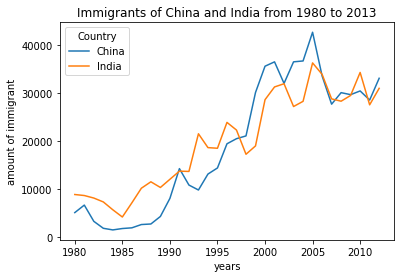

In [7]:
### type your answer here
import matplotlib as mpl
import matplotlib.pyplot as plt

df_china_india.plot(kind='line')
plt.title('Immigrants of China and India from 1980 to 2013')
plt.xlabel('years')
plt.ylabel('amount of immigrant')
plt.show

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [8]:
### type your answer here
df_can.sort_values(by='Total', ascending=False, inplace=True)
df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()
df_top5.head(5)




Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Step 2: Plot graph

<function matplotlib.pyplot.show(close=None, block=None)>

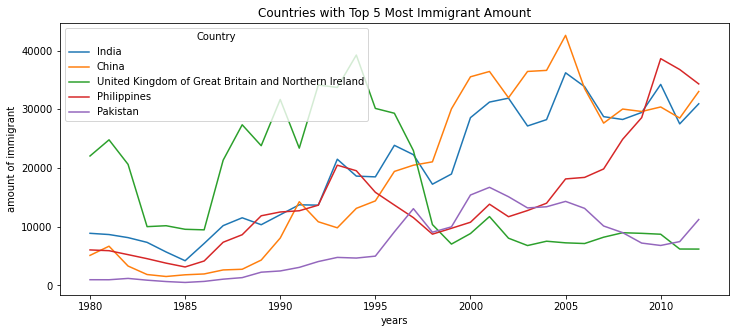

In [9]:
### type your answer here
df_top5.plot(kind='line', figsize=(12,5))
plt.title('Countries with Top 5 Most Immigrant Amount')
plt.xlabel('years')
plt.ylabel('amount of immigrant')
plt.show

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

<function matplotlib.pyplot.show(close=None, block=None)>

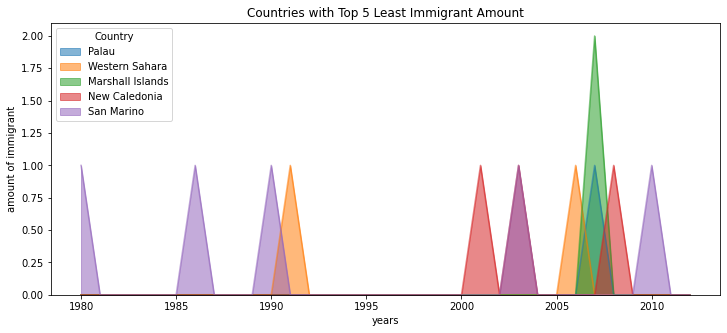

In [10]:
### type your answer here
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()
df_top5.head(5)

df_top5.plot(kind='area', figsize=(12,5), alpha=0.55, stacked=False)
plt.title('Countries with Top 5 Least Immigrant Amount')
plt.xlabel('years')
plt.ylabel('amount of immigrant')
plt.show

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

<function matplotlib.pyplot.show(close=None, block=None)>

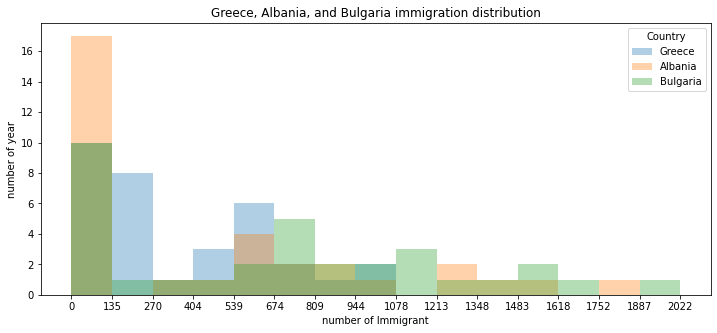

In [11]:
### type your answer here
df_gab = df_can.loc[['Greece','Albania','Bulgaria'], years].transpose()
count, bin_edges = np.histogram(df_gab, 15)
df_gab.plot(kind='hist',bins=15,alpha=0.35,xticks=bin_edges,figsize=(12,5))
plt.title('Greece, Albania, and Bulgaria immigration distribution')
plt.xlabel('number of Immigrant')
plt.ylabel('number of year')
plt.show

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [12]:
### type your answer here
df_can.sort_values(by='Total', ascending=False, inplace=True)
df_top15 = df_can['Total'].head(15)

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

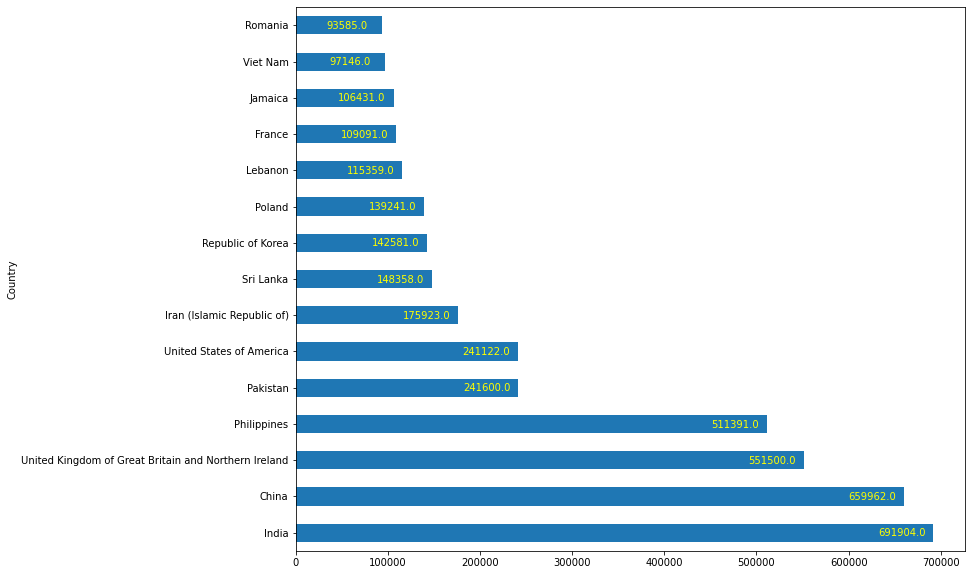

In [13]:
### type your answer here
df_top15.plot(kind='barh', figsize=(12,10))

for index, value in enumerate(df_top15): 
    plt.annotate(value, xy=(value - 60000, index - 0.10), color='yellow')

plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).